#  Machine Learning Script to predict stocks
## By Thamsanqa Sibanda C18727971

### 1. Import Libraries

In [1]:
# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split




### 2. get dataset

In [2]:
stock = yf.Ticker('MSFT')
df = pd.DataFrame(stock.history(period='2y'))


In [3]:
df.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-05-04,171.339036,175.767588,170.661493,175.610474,30372900,0.0,0
2020-05-05,177.358333,180.333615,176.651333,177.495804,36839200,0.0,0
2020-05-06,178.791952,180.873664,178.350081,179.243637,32139300,0.0,0
2020-05-07,180.844245,181.217388,179.282961,180.284546,28316000,0.0,0
2020-05-08,181.639602,181.659245,180.048861,181.345016,30877800,0.0,0


In [4]:
df.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.998886,0.998516,0.996965,-0.141016,-0.001702,NaN
High,0.998886,1.000000,0.998301,0.998479,-0.125906,-0.002221,NaN
Low,0.998516,0.998301,1.000000,0.998642,-0.167931,0.000743,NaN
Close,0.996965,0.998479,0.998642,1.000000,-0.149701,-0.000666,NaN
Volume,-0.141016,-0.125906,-0.167931,-0.149701,1.000000,-0.050827,NaN
Dividends,-0.001702,-0.002221,0.000743,-0.000666,-0.050827,1.000000,NaN
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,NaN


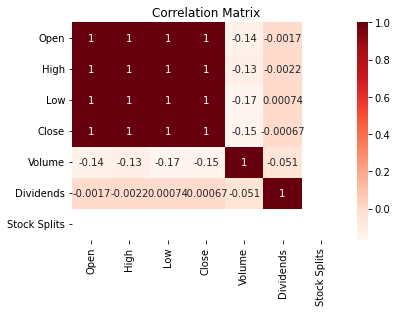

In [5]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

### 3. Preparing the dataset for the model

In [6]:
# check if there are any missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2020-05-04 to 2022-05-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          505 non-null    float64
 1   High          505 non-null    float64
 2   Low           505 non-null    float64
 3   Close         505 non-null    float64
 4   Volume        505 non-null    int64  
 5   Dividends     505 non-null    float64
 6   Stock Splits  505 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 31.6 KB


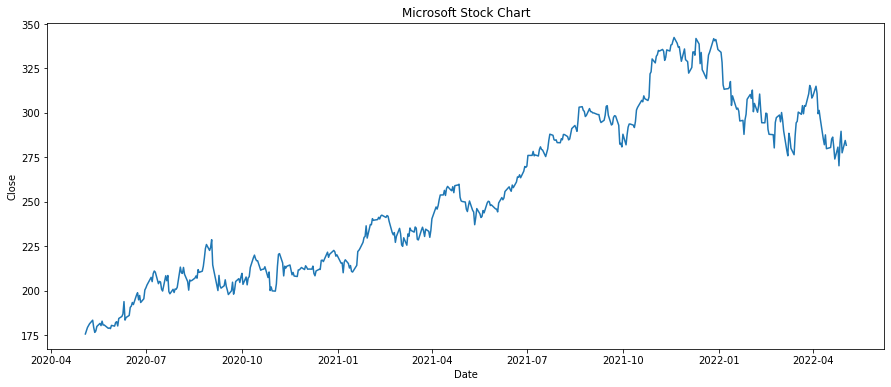

In [7]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df, x="Date", y="Close", ).set_title('Microsoft Stock Chart')
plt.show()

In [8]:
# creating the up = 1 and down = 0 target feature for the dataset

# create a previous close column
prev_close = pd.DataFrame(df['Close'].shift(1))
prev_close.rename(columns = {'Close':'Prev_Close'}, inplace = True)

# 
df = df.drop(['Dividends', 'Stock Splits'], axis=1)
df = pd.concat([df,prev_close], axis=1)
df['Target'] = np.where(df['Close'] > df['Prev_Close'], 1, 0)
df = df.iloc[1: , :]
df.head(5)

,Open,High,Low,Close,Volume,Prev_Close,Target
Date,,,,,,,
2020-05-05,177.358333,180.333615,176.651333,177.495804,36839200,175.610474,1
2020-05-06,178.791952,180.873664,178.350081,179.243637,32139300,177.495804,1
2020-05-07,180.844245,181.217388,179.282961,180.284546,28316000,179.243637,1
2020-05-08,181.639602,181.659245,180.048861,181.345016,30877800,180.284546,1
2020-05-11,179.842631,184.123897,179.548060,183.367813,30892700,181.345016,1


In [9]:
df['Target'].value_counts()

1    271
0    233
Name: Target, dtype: int64

### 4. Creating the Model

In [10]:
x = df.drop(['Target','Prev_Close','Volume', 'Close'], axis=1)
y = df['Close']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [12]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(352, 3) (152, 3) (352,) (152,)


In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor





In [14]:
pipelines = {
    'lr':make_pipeline(LinearRegression()),
    'rf':make_pipeline(RandomForestRegressor(random_state=0)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=0)),
    'ridge':make_pipeline(Ridge(random_state=0)),
    'lasso':make_pipeline(Lasso(random_state=0))
}

In [15]:
LinearRegression().get_params() 

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [16]:
GradientBoostingRegressor().get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [17]:
hypergrid = {
    'lr': {
        
    },
    'rf':{
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },
    'gb':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [19]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV( pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(x_train, y_train)
        fit_models[algo] = model
        print('{} has successfully fit.'.format(algo))
    except NotFittedError:
        print(repr(NotFittedError))

Starting training for lr.
lr has successfully fit.
Starting training for rf.
rf has successfully fit.
Starting training for gb.
gb has successfully fit.
Starting training for ridge.
ridge has successfully fit.
Starting training for lasso.
lasso has successfully fit.


C:\Users\Steven\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.719e+02, tolerance: 7.159e+01
  model = cd_fast.enet_coordinate_descent(


In [20]:
from sklearn.metrics import r2_score, mean_absolute_error

In [21]:
for algo, model in fit_models.items():
    yhat = model.predict(x_test)
    print('{} scores - R2:{} MAE:{}'. format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)) )

lr scores - R2:0.9986244880837596 MAE:1.1754391691096568
rf scores - R2:0.9976223309412285 MAE:1.8300183542772708
gb scores - R2:0.997621792770346 MAE:1.774974069024643
ridge scores - R2:0.9986244882957926 MAE:1.1754395285704353
lasso scores - R2:0.9987235445227125 MAE:1.191357637084435


In [22]:
 fit_models['lr']

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('linearregression',
                                        LinearRegression())]),
             n_jobs=-1, param_grid={})

In [23]:
fit_models['lr']

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('linearregression',
                                        LinearRegression())]),
             n_jobs=-1, param_grid={})

### 5. Deploying model online

In [24]:
from ibm_watson_machine_learning import APIClient
import json

In [25]:
# Authentication
wml_credentials = {
    'apikey': 'Ra2RINZpGRqTMdefsDjMNz55EVLDWKFbbH2Bcke6jFns',
    'url': 'https://eu-gb.ml.cloud.ibm.com'
}

In [26]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----  ------------------------
ID                                    NAME  CREATED
5a3ffc60-22f0-423a-a620-45b4071d080d  PROD  2022-05-03T11:06:56.127Z
------------------------------------  ----  ------------------------


In [27]:
SPACE_ID='5a3ffc60-22f0-423a-a620-45b4071d080d'

In [28]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [29]:
MODEL_NAME = 'Sklearn Stock Predictor'
DEPLOYMENT_NAME = 'Sklearn Deployment'
CHOSEN_MODEL = fit_models['lr']

In [31]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

#Save model
model_details = wml_client.repository.store_model(
    model=CHOSEN_MODEL, 
    meta_props=model_props, 
    training_data=x_train, 
    training_target=y_train,
    pipeline=pipelines['lr']
)

In [32]:
model_uid = wml_client.repository.get_model_id(model_details); model_uid

'59369fb7-4a17-4b8b-9ab6-360a22d9365a'

In [33]:
deployment_props ={
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

deployment = wml_client.deployments.create(
    artifact_uid = model_uid,
    meta_props=deployment_props
)

deployment



#######################################################################################

Synchronous deployment creation for uid: '59369fb7-4a17-4b8b-9ab6-360a22d9365a' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='958ec0b7-0a5f-4196-a4c2-e1c715a6d115'
------------------------------------------------------------------------------------------------




{'entity': {'asset': {'id': '59369fb7-4a17-4b8b-9ab6-360a22d9365a'},
  'custom': {},
  'deployed_asset_type': 'model',
  'hardware_spec': {'id': 'e7ed1d6c-2e89-42d7-aed5-863b972c1d2b',
   'name': 'S',
   'num_nodes': 1},
  'name': 'Sklearn Deployment',
  'online': {},
  'space_id': '5a3ffc60-22f0-423a-a620-45b4071d080d',
  'status': {'online_url': {'url': 'https://eu-gb.ml.cloud.ibm.com/ml/v4/deployments/958ec0b7-0a5f-4196-a4c2-e1c715a6d115/predictions'},
   'serving_urls': ['https://eu-gb.ml.cloud.ibm.com/ml/v4/deployments/958ec0b7-0a5f-4196-a4c2-e1c715a6d115/predictions'],
   'state': 'ready'}},
 'metadata': {'created_at': '2022-05-03T17:05:48.696Z',
  'id': '958ec0b7-0a5f-4196-a4c2-e1c715a6d115',
  'modified_at': '2022-05-03T17:05:48.696Z',
  'name': 'Sklearn Deployment',
  'owner': 'IBMid-6650022Q37',
  'space_id': '5a3ffc60-22f0-423a-a620-45b4071d080d'},
 'system': {'warnings': [{'id': 'Deprecated',
    'message': 'online_url is deprecated and will be removed in a future release. 

In [34]:
 # test scoring
deployment_uid = wml_client.deployments.get_uid(deployment)
payload = {'input_data':[{'fields':x_test.columns.to_numpy().tolist(), 'values':x_test.to_numpy().tolist()}]}
result = wml_client.deployments.score(deployment_uid, payload); result

{'predictions': [{'fields': ['prediction'],
   'values': [[200.75940908152057],
    [202.48789599313247],
    [302.83031746252857],
    [297.7633513183523],
    [331.46453607138847],
    [175.98411576123013],
    [288.19835682303756],
    [340.95455772595017],
    [215.27070279435085],
    [209.68854955185827],
    [288.4789804388166],
    [245.94632507820455],
    [251.30554712478065],
    [230.3513229261329],
    [215.9874520821897],
    [276.16483988951984],
    [286.87227820453234],
    [239.95533171945348],
    [209.92081950932865],
    [192.8901960616265],
    [227.4556849431799],
    [331.75702823968015],
    [289.5173097737096],
    [206.76907300274513],
    [209.16179675418556],
    [333.3377952939404],
    [181.22116182953275],
    [321.34535746561426],
    [198.52476467170237],
    [256.6895026735085],
    [343.96097927842925],
    [213.6363202656314],
    [203.6873788920427],
    [286.8728147397925],
    [231.26341016199817],
    [296.01334080920174],
    [283.1403671584252

In [35]:
payload

{'input_data': [{'fields': ['Open', 'High', 'Low'],
   'values': [[204.51820530091314, 205.9297046283839, 198.63535407526453],
    [202.4058965489362, 205.4065581229983, 199.4644710435926],
    [299.1400146484375, 304.20001220703125, 298.32000732421875],
    [299.6510442219756, 300.96592210061516, 295.8458811484835],
    [333.66010258397336, 337.2327021507327, 327.44294670883943],
    [177.43871794573192, 179.20129745018147, 173.89389124804822],
    [288.0726205247525, 289.862188084487, 286.1438488694623],
    [342.4419106991573, 343.1005524568178, 339.617763747979],
    [216.32565307617185, 217.41426436999777, 213.7822831998337],
    [209.57628468317432, 210.8727120134627, 208.1808872098175],
    [290.9184609761206, 294.3813021285497, 284.5815880537968],
    [244.45878253262077, 247.84123477037068, 242.71300805612293],
    [250.112734257667, 252.24537229661624, 249.1406564590998],
    [230.68099529889233, 232.2978303206355, 228.46901714554986],
    [211.82278787481908, 217.06788905863

In [ ]:
pred_values = np.squeeze(result['predictions'][0]['values']); pred_values
preddf = x_test.join(y_test)
preddf['PRED'] = pred_values
preddf.head()

In [ ]:
deployment_uid

In [37]:
x_test.columns.to_numpy().tolist()

['Open', 'High', 'Low']

In [39]:
x_test.iloc[0].to_numpy().tolist()

[204.51820530091314, 205.9297046283839, 198.63535407526453]

In [45]:
x_test.tail()

,Open,High,Low
Date,,,
2021-04-01,236.543266,240.877953,236.126661
2021-08-20,298.555353,304.651567,296.901800
2020-05-12,183.426742,183.662398,179.008003
2020-11-23,208.764782,210.090897,206.003690
2022-01-12,319.010386,322.742659,316.425704


In [62]:
cols = ['Open','High', 'Low']
data = {
    'Open': 283.96,
    'High': 284.13,
    'Low':280.15
}
index = [pd.to_datetime('today').normalize()]
new_test = pd.DataFrame(data, columns=cols, index=index)
new_test

,Open,High,Low
2022-05-03,283.96,284.13,280.15


In [64]:
model.predict(new_test)[0]

281.1453739393933